In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
1. Read the data

In [64]:
data = pd.read_csv('sample.csv')

In [ ]:
2. Display the first and last 5 rows

In [65]:
print("First 5 rows:\n", data.head())
print("Last 5 rows:\n", data.tail())

First 5 rows:
   First Name  Gender  Salary  Bonus %  Senior Management  \
0      Maria  Female  130590   11.858                  0   
1     Angela  Female   54568   18.523                  1   
2      Allan    Male  125792    5.042                  0   
3      Rohan  Female   45906   11.598                  1   
4    Douglas    Male   97308    6.945                  1   

                   Team  Age  Experience    New_Salary  Incentive  
0               Finance   26           5  146075.36220      20000  
1  Business Development   27           5   64675.63064      19000  
2       Client Services   28           6  132134.43264      18500  
3               Finance   28           7   51230.17788      18000  
4             Marketing   28           7  104066.04060      17000  
Last 5 rows:
    First Name  Gender  Salary  Bonus %  Senior Management  \
20     Louise  Female   63241   15.132                  1   
21      Donna  Female   81014    1.894                  0   
22       Ruby  Fema

In [ ]:
3. Display the number of rows and columns

In [66]:
print("Number of rows and columns:", data.shape)

Number of rows and columns: (25, 10)


In [ ]:
4. Display the number of categorical and numerical columns 

In [67]:
print("Numerical columns:", len(data.select_dtypes(include='number').columns))
print("Categorical columns:", len(data.select_dtypes(include='object').columns))

Numerical columns: 7
Categorical columns: 3


In [ ]:
5. For numerical columns, display the min, max and mode

In [68]:
df = data.select_dtypes(exclude='object')
df = pd.DataFrame({'Min':df.min(), 'Max':df.max(), 'Mode':df.mode().iloc[0]})
print(df)

                         Min          Max       Mode
Salary             41426.000  139852.0000  41426.000
Bonus %                1.256      19.0820      1.256
Senior Management      0.000       1.0000      1.000
Age                   26.000      58.0000     35.000
Experience             5.000      27.0000      5.000
New_Salary         44512.237  158307.6108  44512.237
Incentive          10000.000   20000.0000  11000.000


In [ ]:
6. Display the columns with null values

In [69]:
print("\nColumns with null values:\n", data[data.isnull()].columns)


Columns with null values:
 Index(['First Name', 'Gender', 'Salary', 'Bonus %', 'Senior Management',
       'Team', 'Age', 'Experience', 'New_Salary', 'Incentive'],
      dtype='object')


In [ ]:
7. Calculate the 5 number summary and correlate with box plot (Python code)

count        25.000000
mean      90758.880000
std       28441.424571
min       41426.000000
25%       64714.000000
50%       97308.000000
75%      111737.000000
max      139852.000000
Name: Salary, dtype: float64


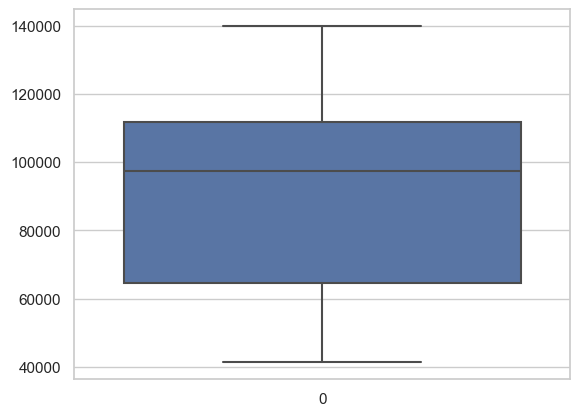

In [70]:
print(data['Salary'].describe())
sns.boxplot(data=data['Salary'])
plt.show()

In [ ]:
8. Display the outlier values using Z-score (Python code)

In [71]:
z_scores = zscore(data['Salary'])
print(data[(z_scores > 3) | (z_scores < -3)])

Empty DataFrame
Columns: [First Name, Gender, Salary, Bonus %, Senior Management, Team, Age, Experience, New_Salary, Incentive]
Index: []


In [ ]:
9. Display the features with high positive correlation, high negative correlation and no correlation (Python code) 

In [72]:
correlation_matrix = data.select_dtypes(exclude='object').corr()

high_positive_corr = (correlation_matrix > 0.8) & (correlation_matrix < 1)
high_negative_corr = (correlation_matrix < -0.8) & (correlation_matrix > -1)
no_corr = (correlation_matrix >= -0.2) & (correlation_matrix <= 0.2)

print('High Positive Correlation:\n', high_positive_corr)
print('High Negative Correlation:\n', high_negative_corr)
print('No Correlation:\n', no_corr)

High Positive Correlation:
                    Salary  Bonus %  Senior Management    Age  Experience  \
Salary              False    False              False  False       False   
Bonus %             False    False              False  False       False   
Senior Management   False    False              False  False       False   
Age                 False    False              False  False        True   
Experience          False    False              False   True       False   
New_Salary           True    False              False  False       False   
Incentive           False    False              False  False       False   

                   New_Salary  Incentive  
Salary                   True      False  
Bonus %                 False      False  
Senior Management       False      False  
Age                     False      False  
Experience              False      False  
New_Salary              False      False  
Incentive               False      False  
High Negative Corre

In [ ]:
10. Analyze the skewness of the features using plot distribution graph and display the features with right skew, left skew and no skew (Python code)

Bonus % has No Skew


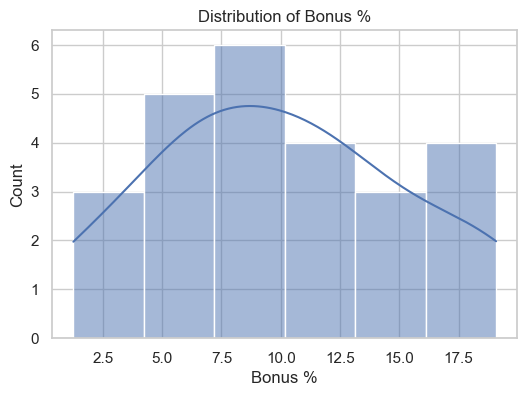

In [80]:
column_name = 'Bonus %'

skewness = data[column_name].skew()

if skewness > 0.5:
    print(f"{column_name} has Right Skew")
elif skewness < -0.5:
    print(f"{column_name} has Left Skew")
else:
    print(f"{column_name} has No Skew")
    
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data[column_name], kde=True, ax=ax)
ax.set_title(f'Distribution of {column_name}')
plt.show()

In [ ]:
11. Perform univariate analysis for categorical variables using bar plot 

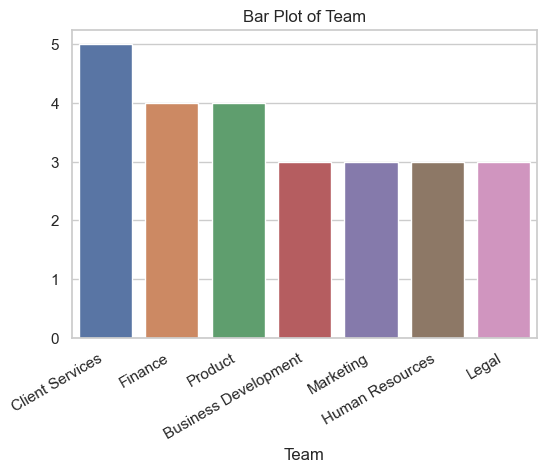

In [87]:
value_counts = data['Team'].value_counts()
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values,ax=ax)
plt.title(f'Bar Plot of Team')
plt.xticks(rotation=30, ha='right')
plt.show()

In [ ]:
12. Perform univariate analysis for continuous variables using swarm plot and violin plot

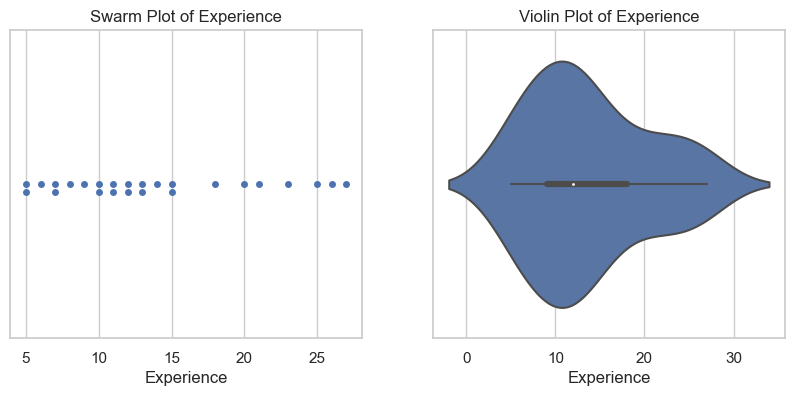

In [90]:
column_name = 'Experience'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.swarmplot(x=column_name, data=data, ax=axes[0])
axes[0].set_title(f'Swarm Plot of {column_name}')

sns.violinplot(x=column_name, data=data, ax=axes[1])
axes[1].set_title(f'Violin Plot of {column_name}')

plt.show()

In [ ]:
13. Display the scatter plat to show the relationship between two continuous variables

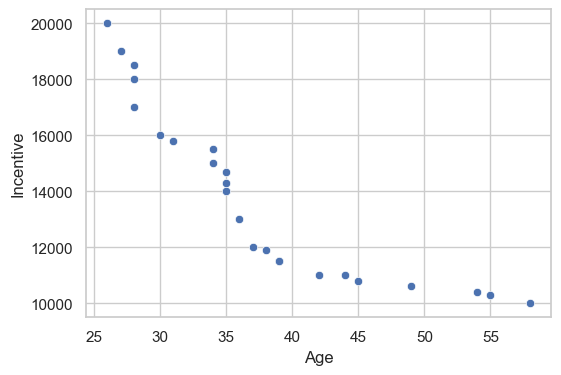

In [96]:
fig, axes = plt.subplots(1,1,figsize=(6, 4))
sns.scatterplot(x='Age', y='Incentive', data=data, ax=axes)
plt.show()

In [ ]:
14. Perform a bivariate analysis between continuous variable and categorical variable using categorical plot 

C:\Users\mehra\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


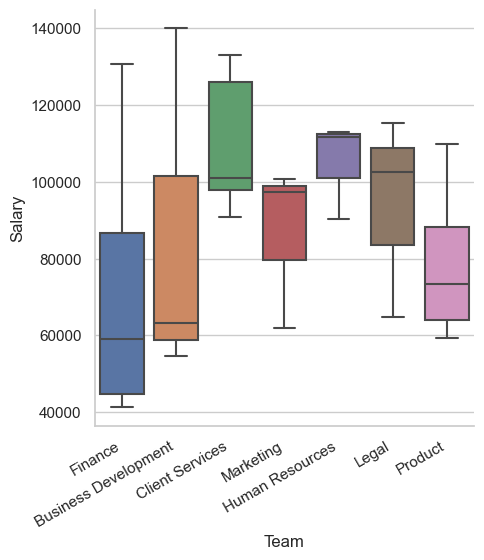

In [99]:
sns.catplot(x='Team', y='Salary', data=data, kind='box')
plt.xticks(rotation=30, ha='right')
plt.show()

In [ ]:
15. Display the counts of observations for categorical variable using count plot

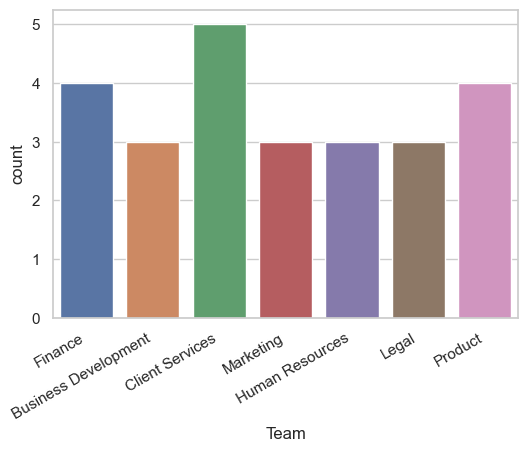

In [101]:
fig, axes = plt.subplots(1,1,figsize=(6, 4))
sns.countplot(x='Team', data=data, ax=axes)
plt.xticks(rotation=30, ha='right')
plt.show()

In [ ]:
16. Perform multivariate analysis between features using pair plot

C:\Users\mehra\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


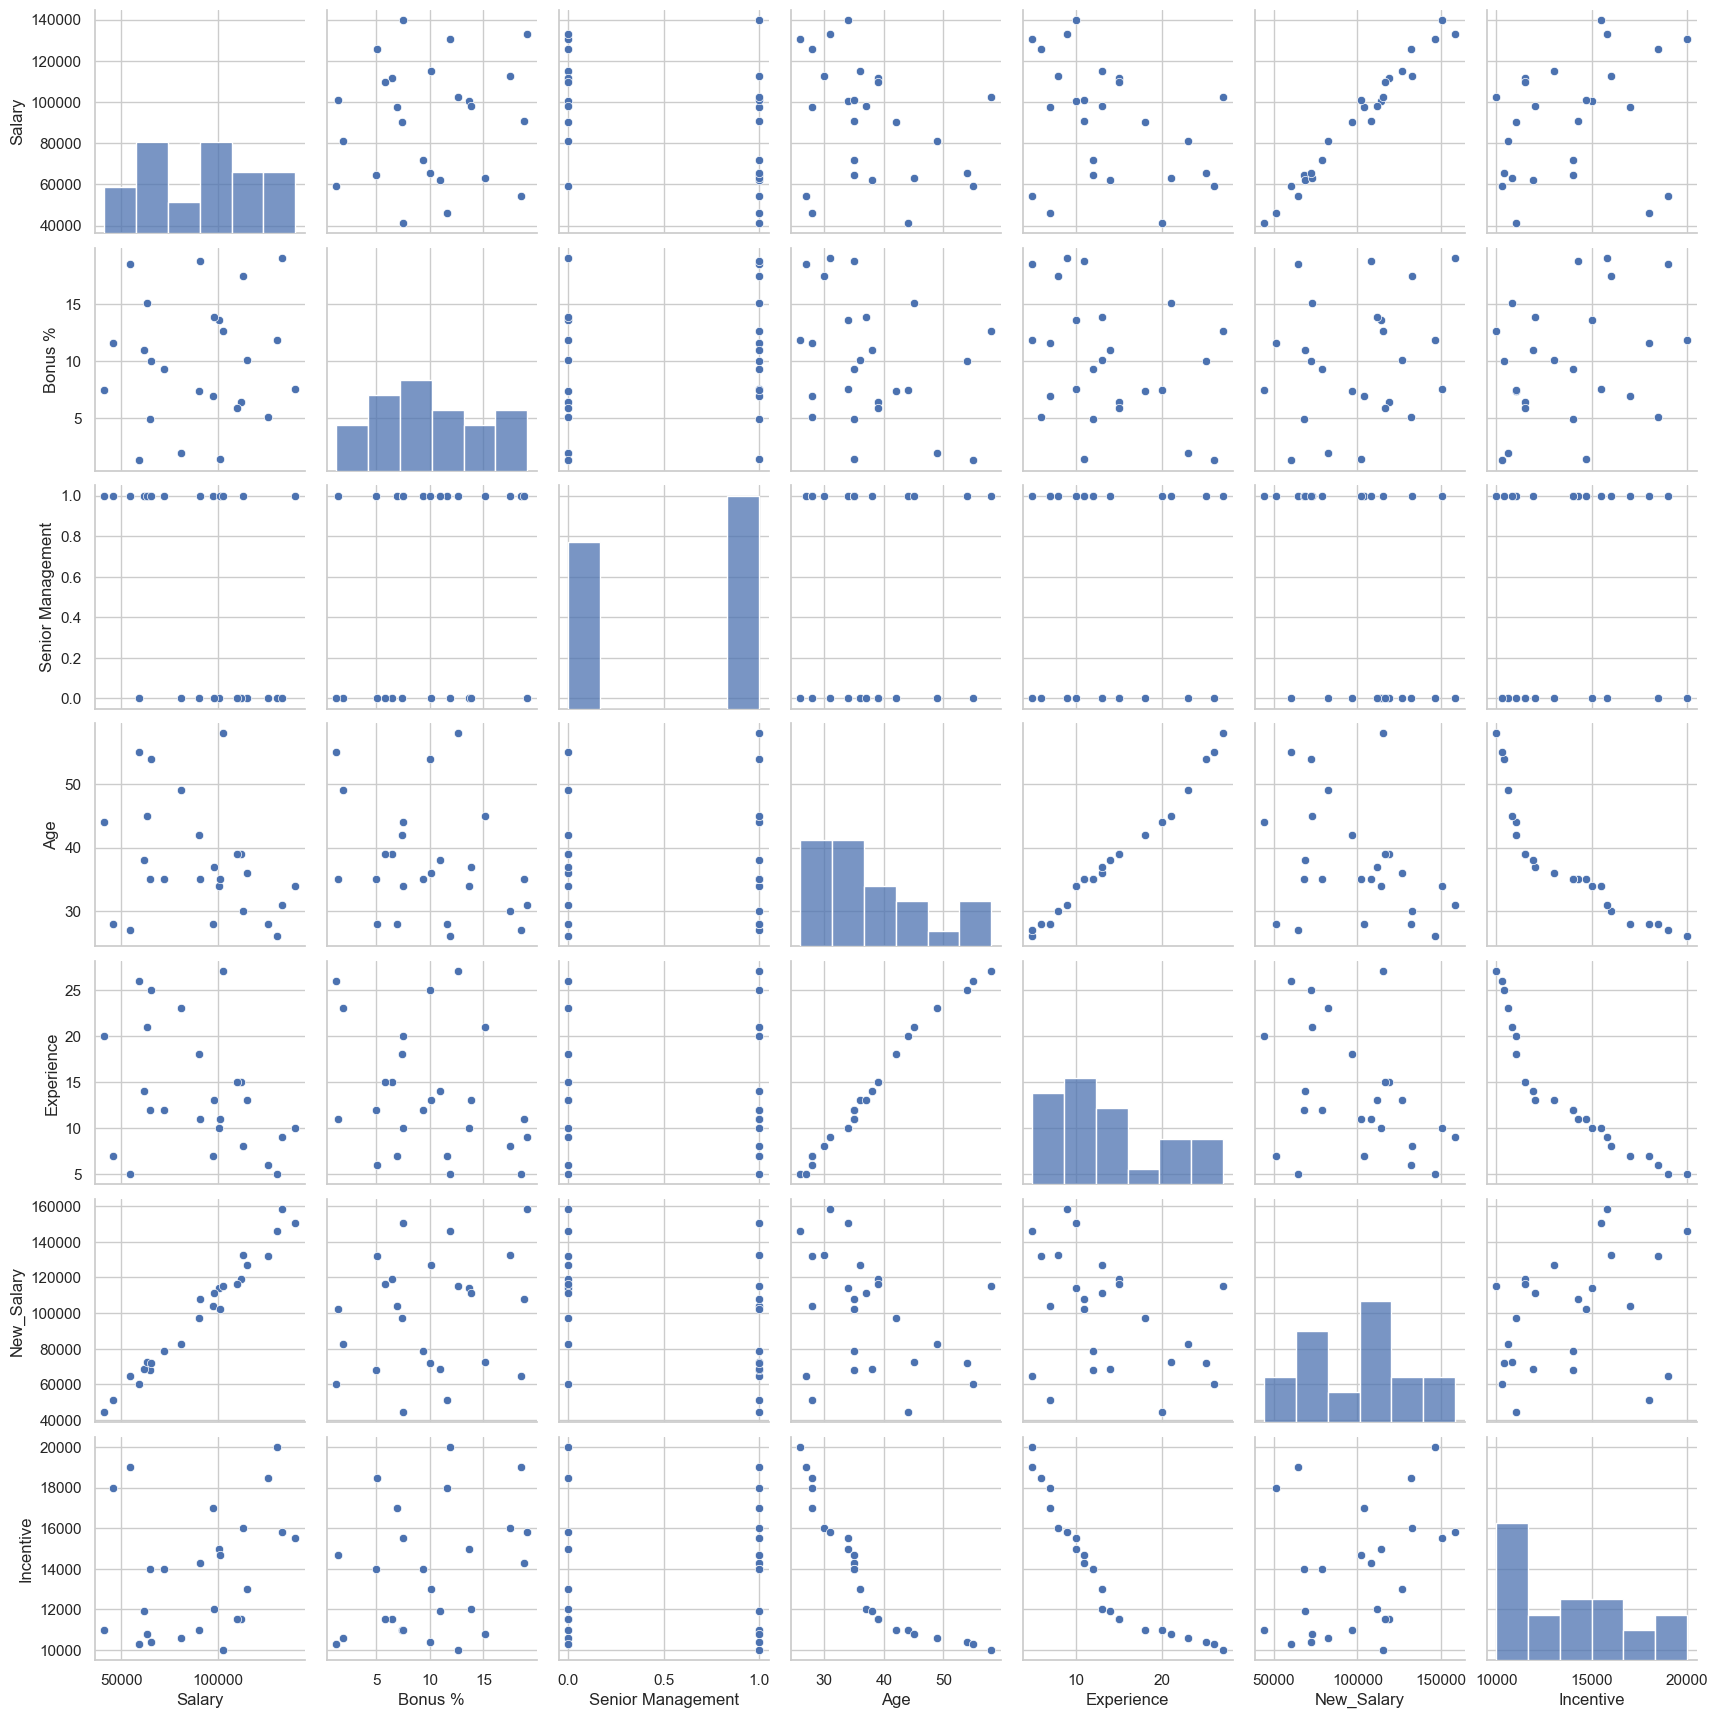

In [79]:
sns.pairplot(data)
plt.show()